In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as ts
from scipy import signal
from scipy.ndimage.filters import gaussian_filter
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AR
import statistics, math
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

path = "Istanbul_StockMarket_09-11.xlsx"

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
data = pd.read_excel(path) 

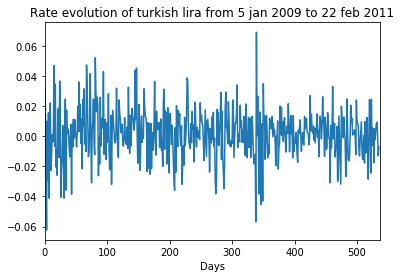

In [6]:
lira = list(data[1][2:])
plt.plot(range(536), lira)
plt.title('Rate evolution of turkish lira from 5 jan 2009 to 22 feb 2011')
plt.xlabel('Days')
plt.xlim(0,536)
plt.show()

In [7]:
# Dickey — Fuller test 
# http://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html
# https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
# adfuller return
# [0] adf
# [1] p-value // Критерий Дики-Фуллера
# [4] Critical values 
result = ts.adfuller(lira,1) 
print('P-value', result[1])
print('Critical values', result[4])

P-value 0.0
Critical values {'1%': -3.4426321555520905, '5%': -2.8669574839413801, '10%': -2.5696553279762426}


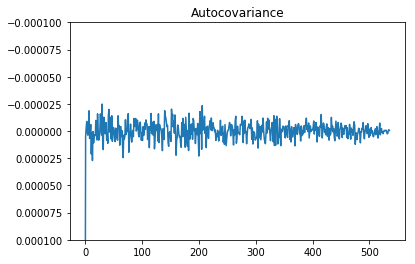

In [8]:
# http://lib.sernam.ru/book_spa1.php?id=5
plt.plot(range(536), ts.acovf(lira))
plt.title('Autocovariance')
plt.ylim([1e-4, -1e-4])
plt.show()

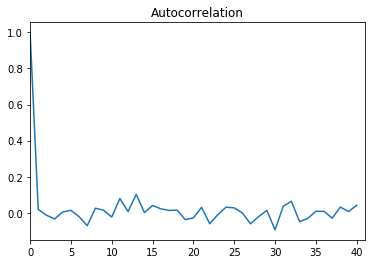

In [10]:
import statsmodels
plt.plot(range(len(statsmodels.tsa.stattools.acf(lira))), statsmodels.tsa.stattools.acf(lira))
plt.title('Autocorrelation')
plt.xlim(0,41)
plt.show()

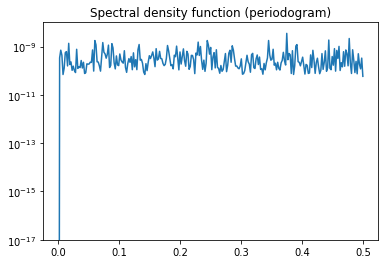

In [11]:
# https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.signal.periodogram.html
# spectral density function
# periodogram
f, Pxx_den = signal.periodogram(ts.acovf(lira))
plt.semilogy(f, Pxx_den)
plt.ylim([1e-17, 1e-8])
plt.title('Spectral density function (periodogram)')
plt.show()

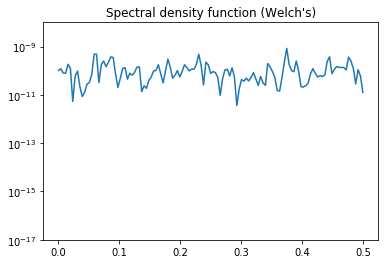

In [12]:
# welch
f, Pxx_den = signal.welch(ts.acovf(lira))
plt.semilogy(f, Pxx_den)
plt.ylim([1e-17, 1e-8])
plt.title('Spectral density function (Welch\'s)')
plt.show()

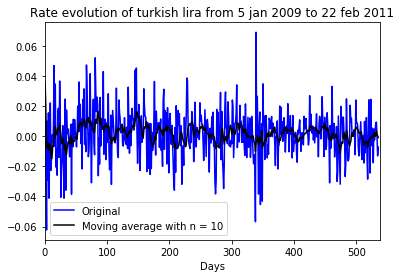

In [13]:
# Moving average
def moving_average(l, N):
    sum = 0
    result = list( 0 for x in l)
    for i in range( 0, N ):
        sum = sum + l[i]
        result[i] = sum / (i+1)
    for i in range( N, len(l) ):
        sum = sum - l[i-N] + l[i]
        result[i] = sum / N
    return result

lira_ma=moving_average(lira, 10)
ax = plt.subplot(111)
plt.plot(range(536), lira, label = 'Original', color = 'b')
plt.plot(range(536), lira_ma, label = 'Moving average with n = %i'  % 10, color = 'k')
plt.title('Rate evolution of turkish lira from 5 jan 2009 to 22 feb 2011' )
plt.xlabel('Days')
plt.xlim(0,537)
ax.legend()
plt.show()

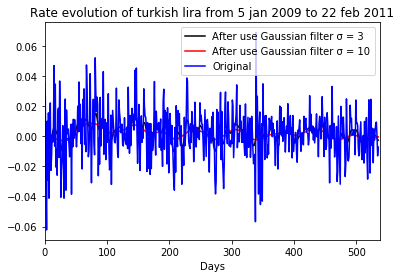

In [14]:
# Gaussian filter

sigma = 10
ax = plt.subplot(111)
lira_gauss = gaussian_filter(lira, sigma = sigma)
plt.plot(range(536), gaussian_filter(lira, sigma = 3), label = 'After use Gaussian filter σ = %i'  % 3, color = 'k')
plt.plot(range(536), lira_gauss, label = 'After use Gaussian filter σ = %i'  % sigma, color = 'r')
plt.plot(range(536), lira, label = 'Original', color = 'b')
plt.title('Rate evolution of turkish lira from 5 jan 2009 to 22 feb 2011' )
plt.xlabel('Days')
plt.xlim(0,537)
ax.legend()
plt.show()

In [15]:
result = ts.adfuller(lira_gauss) 
print('P-value', result[1])
print('Critical values', result[4])


P-value 0.184531829374
Critical values {'1%': -3.4430866847692538, '5%': -2.8671575500153961, '10%': -2.5697619453458325}


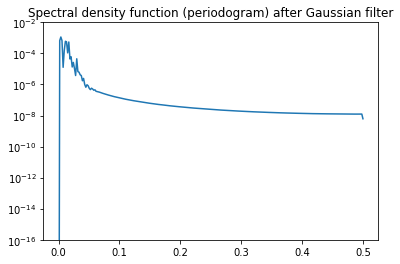

In [16]:
# periodogram
f, Pxx_den = signal.periodogram(lira_gauss)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-16, 1e-2])
plt.title('Spectral density function (periodogram) after Gaussian filter')
plt.show()

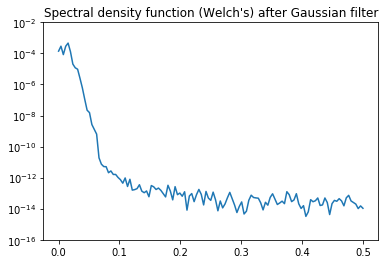

In [17]:
# welch
f, Pxx_den = signal.welch(lira_gauss)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-16, 1e-2])
plt.title('Spectral density function (Welch\'s) after Gaussian filter')
plt.show()

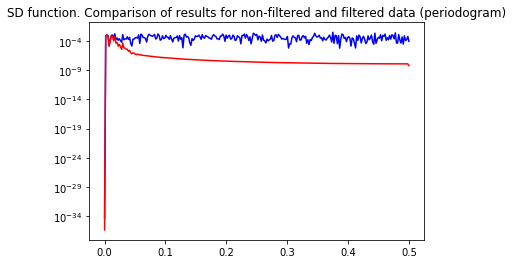

In [18]:
# Comparison for periodogram
f, Pxx_den = signal.periodogram(lira)
f_gauss, Pxx_den_gauss = signal.periodogram(lira_gauss)
plt.semilogy(f, Pxx_den, label = 'For original', color = 'b')
plt.semilogy(f_gauss, Pxx_den_gauss, label = 'For filtered', color = 'r')
plt.title('SD function. Comparison of results for non-filtered and filtered data (periodogram)')
plt.show()

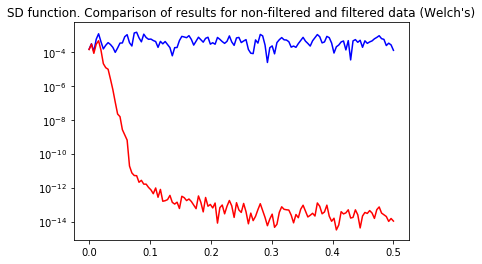

In [19]:
# Comparison for Welch's
f, Pxx_den = signal.welch(lira)
f_gauss, Pxx_den_gauss = signal.welch(lira_gauss)
plt.semilogy(f, Pxx_den, label = 'For original', color = 'b')
plt.semilogy(f_gauss, Pxx_den_gauss, label = 'For filtered', color = 'r')
plt.title('SD function. Comparison of results for non-filtered and filtered data (Welch\'s)')
plt.show()

In [20]:
# https://habrahabr.ru/post/207160/#1

Lag: 16
Coefficients: [ 0.00201073  0.03809042  0.02732462 -0.03943648  0.04778463  0.009189
 -0.04784633 -0.07368953  0.0281736   0.00147224  0.00169649  0.06317909
  0.01064924  0.07707876 -0.0002568   0.05859327  0.04229051]
Test MSE: 0.0002066


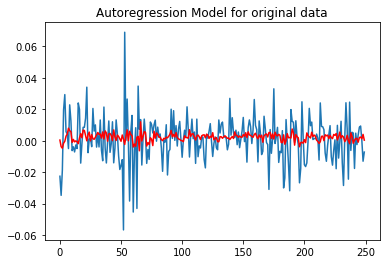

In [21]:
# http://www.statsmodels.org/0.6.1/generated/statsmodels.tsa.ar_model.AR.html
# https://en.wikipedia.org/wiki/Autoregressive_model
# http://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/


train, test = lira[1:len(lira)-250], lira[len(lira)-250:]
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
            yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
error = mean_squared_error(test, predictions)
print('Test MSE: %.7f' % error)
# plot
plt.plot(test)
plt.title('Autoregression Model for original data')
plt.plot(predictions, color='red')
plt.show()

In [19]:
train, test = gaussian_filter(lira, sigma = 1)[1:len(lira)-250], gaussian_filter(lira, sigma = 1)[len(lira)-250:]
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.7f' % error)
# plot
plt.plot(test)
plt.title('Autoregression Model for filtered data')
plt.plot(predictions, color='red')
plt.show()

Lag: 16
Coefficients: [  3.43386651e-04   1.94801578e+00  -2.29890225e+00   2.13703334e+00
  -1.70572488e+00   1.25282402e+00  -9.18288623e-01   6.08121491e-01
  -3.46525157e-01   1.80819435e-01  -9.09774006e-02   1.10757150e-01
  -1.01261294e-01   1.39514091e-01  -1.16082909e-01   9.67016966e-02
  -4.08179029e-02]
Test MSE: 0.0000082


In [22]:
# Rice
# http://www.adv-radio-sci.net/4/175/2006/ars-4-175-2006.pdf
import random
from scipy.stats import rayleigh

phi=random.uniform(0, math.pi) 
# cdf = rayleigh.cdf(x)

In [23]:
# Влияние политики на курс лиры 
result_= list(data[1][2:])
result=[]
i=0
while i < 535:
    result.append(math.fabs(result_[i+1] - result_[i]))
    i+=1

print('Изменение курса по модулю:')
print('Медиана ', statistics.median(result))
print('Среднее ', np.mean(result))
print('Следующие изменения, вызванные политической обстановкой, обеспечивали рост курса лиры:')
print('''На следующий день после победы на локальных выборах 22.03.2009 партии справедливости и развития  +''', '0.033')
print('''На следующий рабочий день после объявления 7.05.2010 о проведении референдума (max изменение)  +''', max(result))
print('''На следующий день после победы сторонников референдума 12.09.2010  +''', '0.02917')

Изменение курса по модулю:
Медиана  0.013587516
Среднее  0.0174162401084
Следующие изменения, вызванные политической обстановкой, обеспечивали рост курса лиры:
На следующий день после победы на локальных выборах 22.03.2009 партии справедливости и развития  + 0.033
На следующий рабочий день после объявления 7.05.2010 о проведении референдума (max изменение)  + 0.125704296
На следующий день после победы сторонников референдума 12.09.2010  + 0.02917


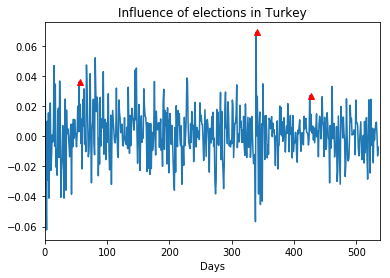

In [24]:
x_election = [57, 341, 427] #338
y_election = [data[1][57], data[1][341], data[1][427]]
plt.plot(range(536), lira )
plt.plot(x_election, y_election,  color = 'red', marker = '^', linestyle='None')
plt.title('Influence of elections in Turkey')
plt.xlabel('Days')
plt.xlim(0,537)
plt.show()

In [25]:
dollar = list(data[2][2:])

In [26]:
# малые значения
print('Cross-correlation between FTSE and lira', np.correlate(lira, data[5][2:]))

Cross-correlation between FTSE and lira [0.06904581560779689]


In [27]:
print('Cross-correlation between dollar and lira', np.correlate(lira, dollar))

Cross-correlation between dollar and lira [ 0.17465029]
